<a href="https://colab.research.google.com/github/lazeicoder/Spam-and-smishing-detection-/blob/master/DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

path = "Dataset_10191.csv"
df = pd.read_csv(path)

print("Original shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isna().sum())


Original shape: (10191, 5)

Columns: ['LABEL', 'TEXT', 'URL', 'EMAIL', 'PHONE']

Missing values per column:
 LABEL    0
TEXT     0
URL      0
EMAIL    0
PHONE    0
dtype: int64


In [22]:
num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)

df = df.drop_duplicates().reset_index(drop=True)
print("Shape after dropping duplicates:", df.shape)

class_counts = df["LABEL"].value_counts()
class_ratio = class_counts / len(df)

print("\nClass counts:\n", class_counts)
print("\nClass ratios:\n", class_ratio)


Number of duplicate rows: 2169
Shape after dropping duplicates: (8022, 5)

Class counts:
 LABEL
ham         3393
smishing    2656
spam        1973
Name: count, dtype: int64

Class ratios:
 LABEL
ham         0.422962
smishing    0.331090
spam        0.245949
Name: count, dtype: float64


In [23]:
binary_map = {"Yes": 1, "No": 0, "YES": 1, "NO": 0}
for col in ["URL", "EMAIL", "PHONE"]:
    df[col] = df[col].map(binary_map)

label_map = {"ham": 0, "smishing": 1}
df["LABEL_ENC"] = df["LABEL"].map(label_map)

In [24]:
def clean_text_basic(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["TEXT_CLEAN"] = df["TEXT"].astype(str).apply(clean_text_basic)

df["CHAR_LEN"] = df["TEXT_CLEAN"].apply(len)
df["WORD_COUNT"] = df["TEXT_CLEAN"].apply(lambda x: len(x.split()))

print("\nText length statistics (overall):")
print(df[["CHAR_LEN", "WORD_COUNT"]].describe())


Text length statistics (overall):
          CHAR_LEN   WORD_COUNT
count  8022.000000  8022.000000
mean    108.757542    21.077412
std      56.997752    10.645850
min       0.000000     0.000000
25%      57.000000    12.000000
50%     125.000000    23.000000
75%     149.000000    28.000000
max     767.000000   173.000000


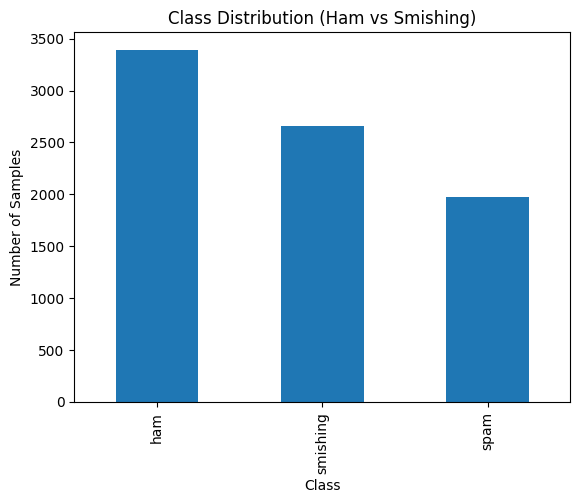

In [25]:
plt.figure()
class_counts.plot(kind="bar")
plt.title("Class Distribution (Ham vs Smishing)")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

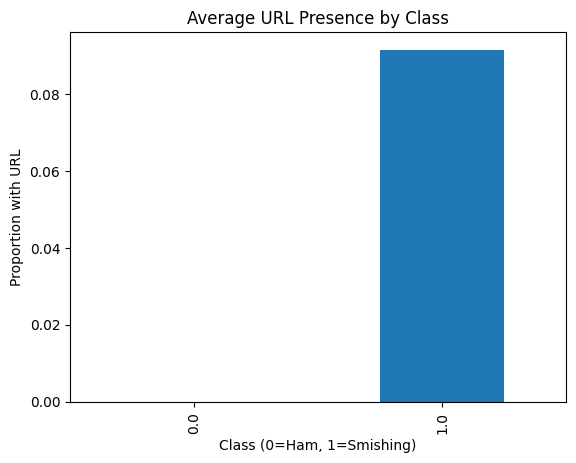

In [26]:
url_by_class = df.groupby("LABEL_ENC")["URL"].mean()
plt.figure()
url_by_class.plot(kind="bar")
plt.title("Average URL Presence by Class")
plt.xlabel("Class (0=Ham, 1=Smishing)")
plt.ylabel("Proportion with URL")
plt.show()

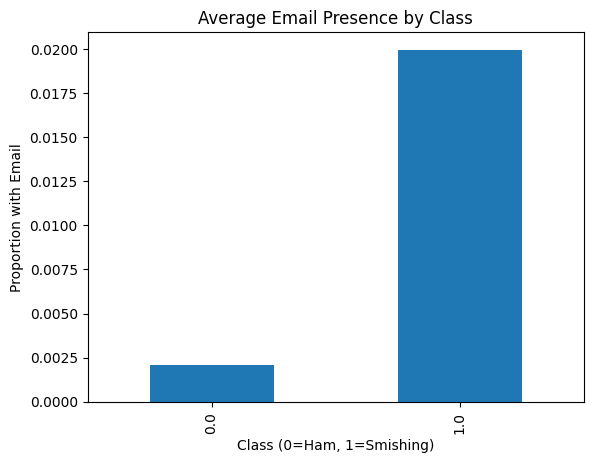

In [27]:
email_by_class = df.groupby("LABEL_ENC")["EMAIL"].mean()
plt.figure()
email_by_class.plot(kind="bar")
plt.title("Average Email Presence by Class")
plt.xlabel("Class (0=Ham, 1=Smishing)")
plt.ylabel("Proportion with Email")
plt.show()

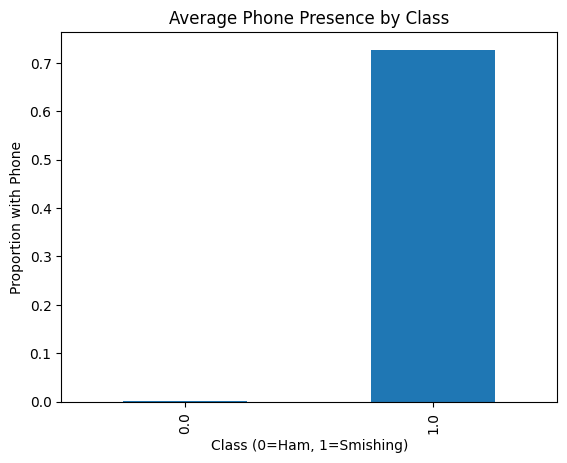

In [28]:
phone_by_class = df.groupby("LABEL_ENC")["PHONE"].mean()
plt.figure()
phone_by_class.plot(kind="bar")
plt.title("Average Phone Presence by Class")
plt.xlabel("Class (0=Ham, 1=Smishing)")
plt.ylabel("Proportion with Phone")
plt.show()

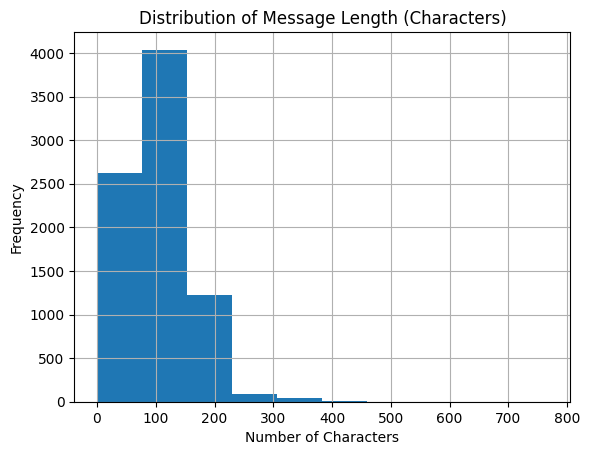

In [29]:
plt.figure()
df["CHAR_LEN"].hist()
plt.title("Distribution of Message Length (Characters)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

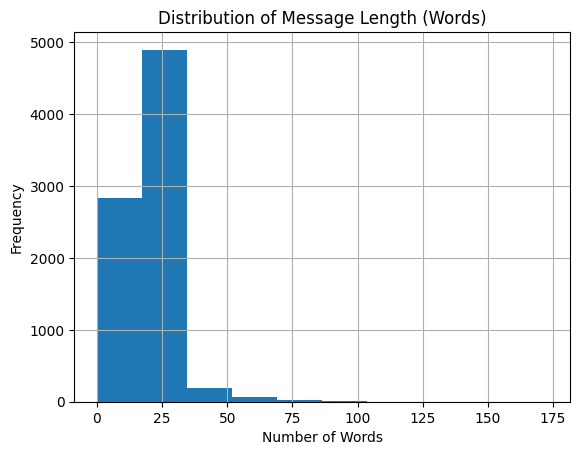

In [30]:
plt.figure()
df["WORD_COUNT"].hist()
plt.title("Distribution of Message Length (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

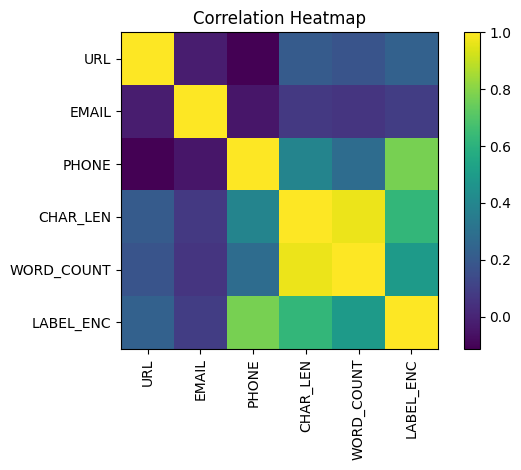

In [31]:
numeric_cols = ["URL", "EMAIL", "PHONE", "CHAR_LEN", "WORD_COUNT", "LABEL_ENC"]
corr = df[numeric_cols].corr()

plt.figure()
plt.imshow(corr)
plt.title("Correlation Heatmap")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.tight_layout()
plt.show()

In [32]:
print("\nFinal dataset shape:", df.shape)
print("\nCorrelation matrix:\n", corr.round(3))

print("\nPreprocessing completed:")
print("- Duplicates removed")
print("- Binary features encoded (URL, EMAIL, PHONE)")
print("- Labels encoded (ham=0, smishing=1)")
print("- Basic text normalization applied")
print("- Engineered features: CHAR_LEN, WORD_COUNT")
print("- Visualizations generated for class balance, feature distributions, and correlations")


Final dataset shape: (8022, 9)

Correlation matrix:
               URL  EMAIL  PHONE  CHAR_LEN  WORD_COUNT  LABEL_ENC
URL         1.000 -0.024 -0.112     0.206       0.176      0.231
EMAIL      -0.024  1.000 -0.043     0.074       0.061      0.090
PHONE      -0.112 -0.043  1.000     0.391       0.280      0.773
CHAR_LEN    0.206  0.074  0.391     1.000       0.968      0.624
WORD_COUNT  0.176  0.061  0.280     0.968       1.000      0.493
LABEL_ENC   0.231  0.090  0.773     0.624       0.493      1.000

Preprocessing completed:
- Duplicates removed
- Binary features encoded (URL, EMAIL, PHONE)
- Labels encoded (ham=0, smishing=1)
- Basic text normalization applied
- Engineered features: CHAR_LEN, WORD_COUNT
- Visualizations generated for class balance, feature distributions, and correlations
